In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import gseapy
import matplotlib.pyplot as plt

sc.settings.verbosity = 2             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

In [2]:
sc.settings.set_figure_params(dpi=80)

In [3]:
#Load your data
adata = sc.read('./write/Ingest_all_small.h5ad')

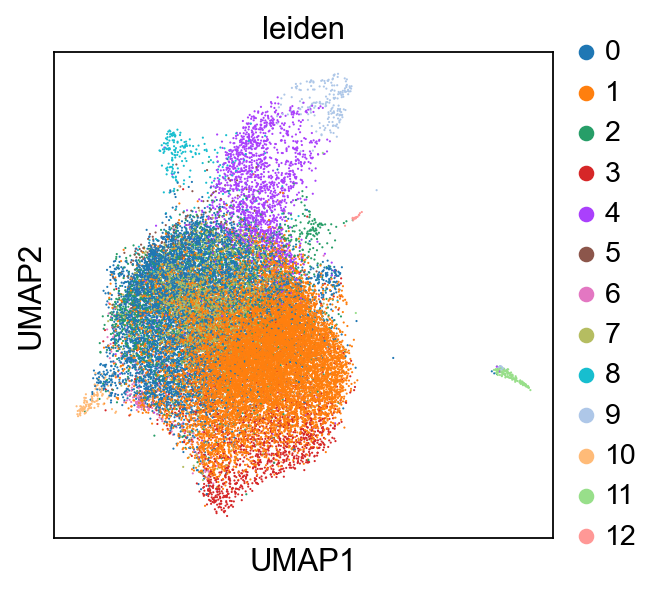

In [4]:
sc.pl.umap(adata, color='leiden')

# Subset satellite cells for further analyses

In [5]:
adata_subset = adata[adata.obs['leiden'].isin(['0', '1', '2', '3', '5', '6', '7', '10'])]

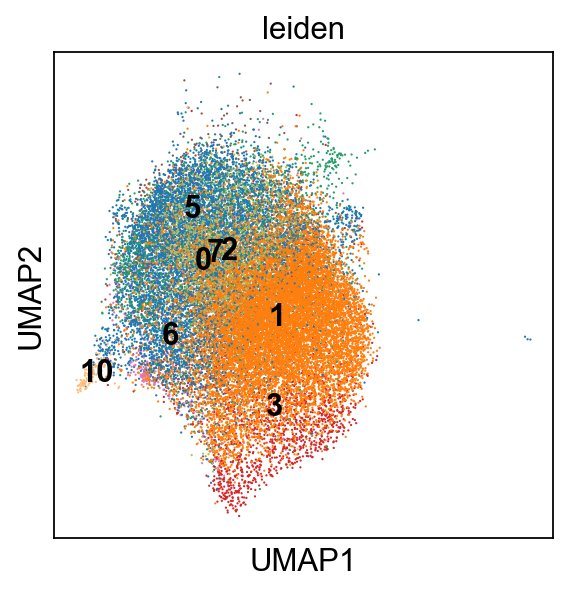

In [6]:
sc.pl.umap(adata_subset, color='leiden', legend_loc='on data')

## Differential Expression 

In [7]:
sc.tl.rank_genes_groups(adata_subset, groupby='age', method='wilcoxon')

ranking genes


Trying to set attribute `._uns` of view, copying.


    finished (0:00:29)


Visualize marker genes

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_age']`


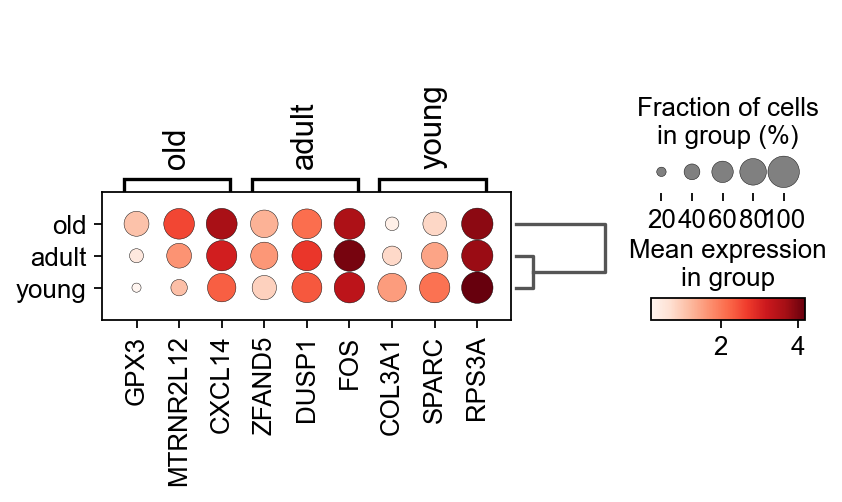

In [8]:
sc.pl.rank_genes_groups_dotplot(adata_subset, n_genes=3)

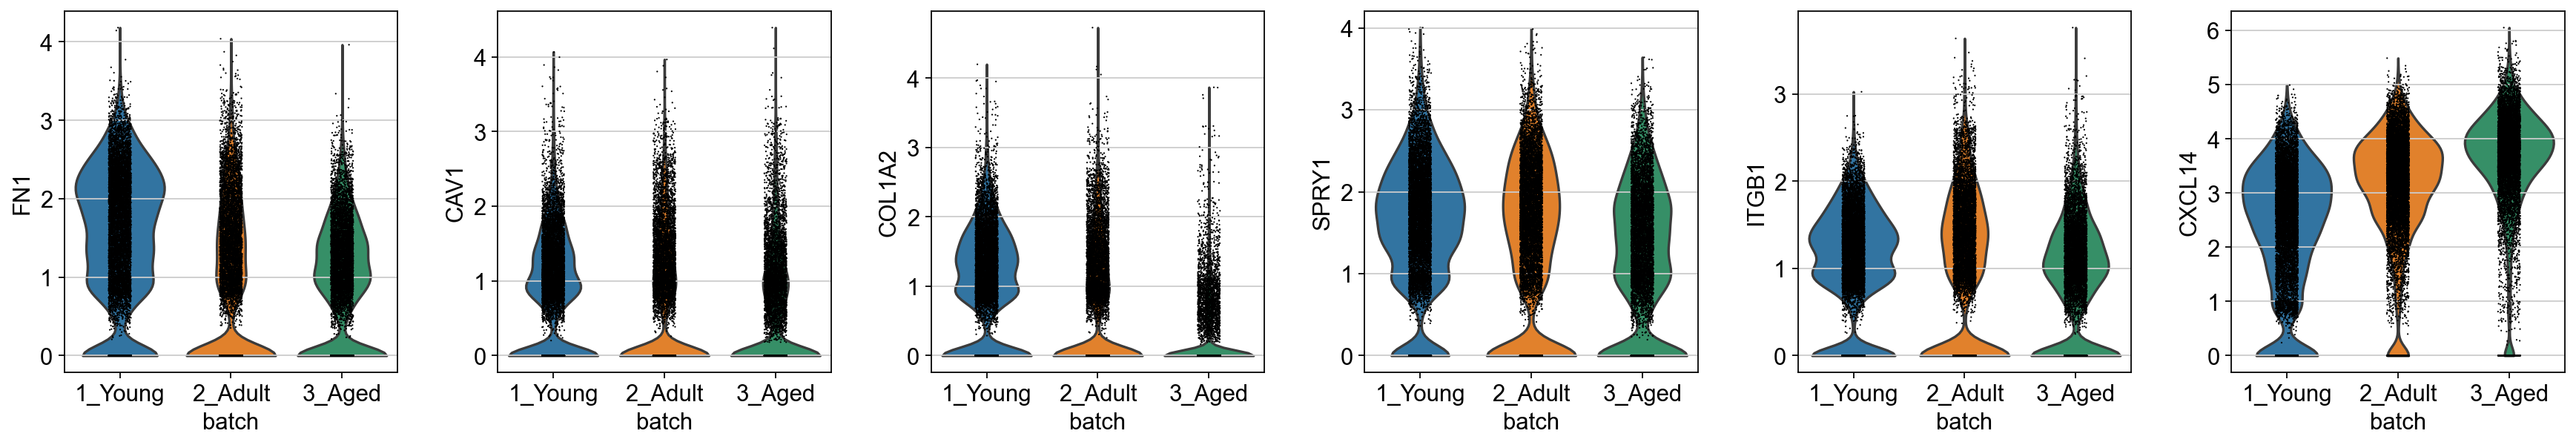

In [9]:
sc.pl.violin(adata_subset, ['FN1', 'CAV1', 'COL1A2', 'SPRY1', 'ITGB1', 'CXCL14'], groupby='batch')

Export genes and p values for each age group

In [10]:
result = adata_subset.uns['rank_genes_groups']
groups = result['names'].dtype.names
df = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals', 'logfoldchanges']})

In [11]:
df.to_csv('ingest_all_SCcluster_markers.csv')

# Subset other cluster of interest

In [12]:
adata_prog = adata[adata.obs['leiden'].isin(['4'])]

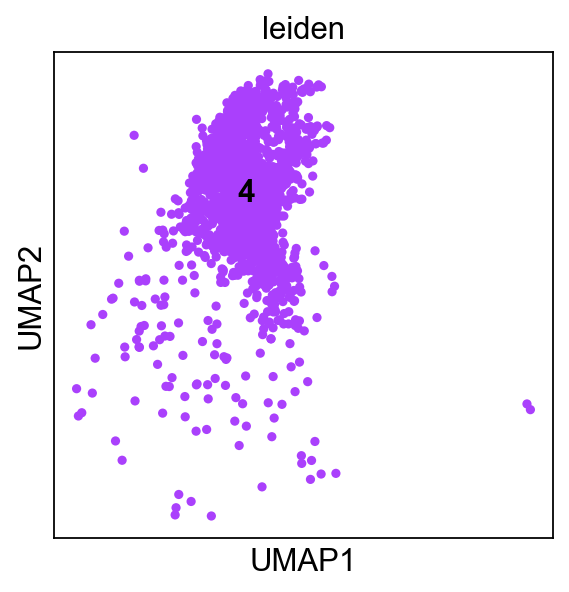

In [13]:
sc.pl.umap(adata_prog, color='leiden', legend_loc='on data')

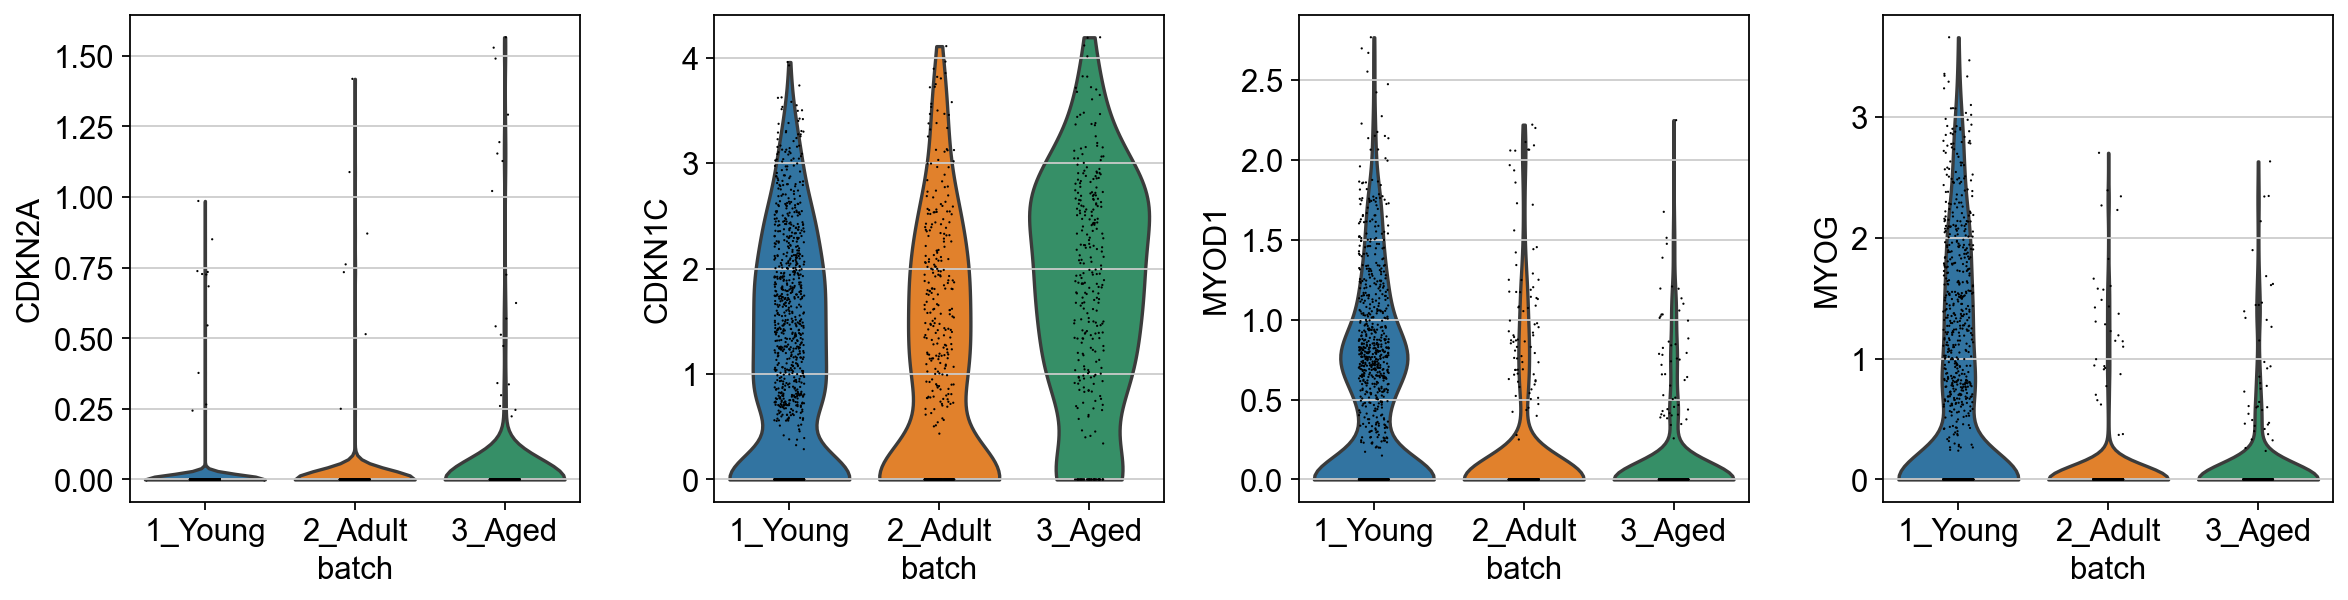

In [14]:
sc.pl.violin(adata_prog, ['CDKN2A', 'CDKN1C', 'MYOD1', 'MYOG'], groupby='batch')

## Differential Expression

In [15]:
sc.tl.rank_genes_groups(adata_prog, groupby='age', method='wilcoxon')

ranking genes


Trying to set attribute `._uns` of view, copying.


    finished (0:00:01)


    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_age']`


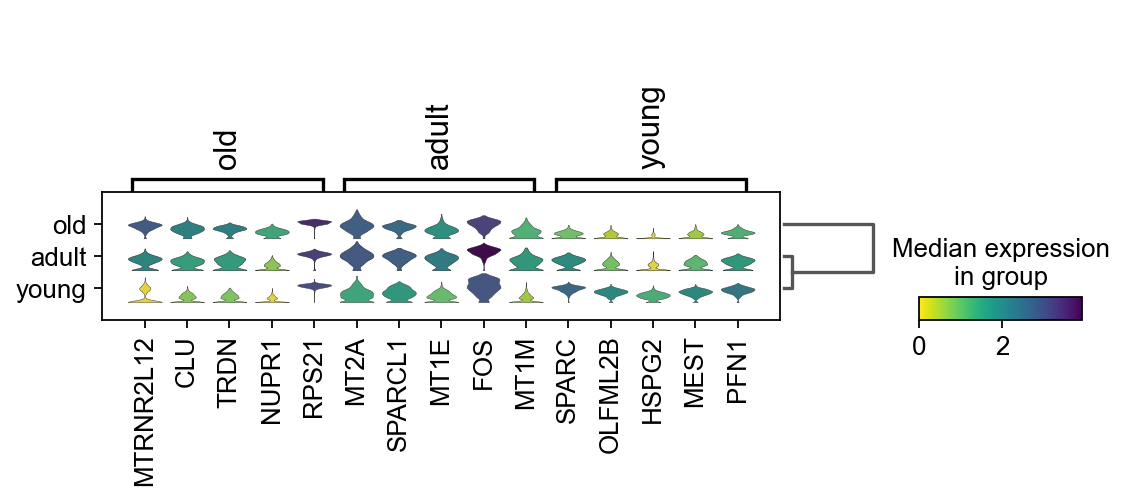

In [16]:
sc.pl.rank_genes_groups_stacked_violin(adata_prog, n_genes=5, cmap='viridis_r')

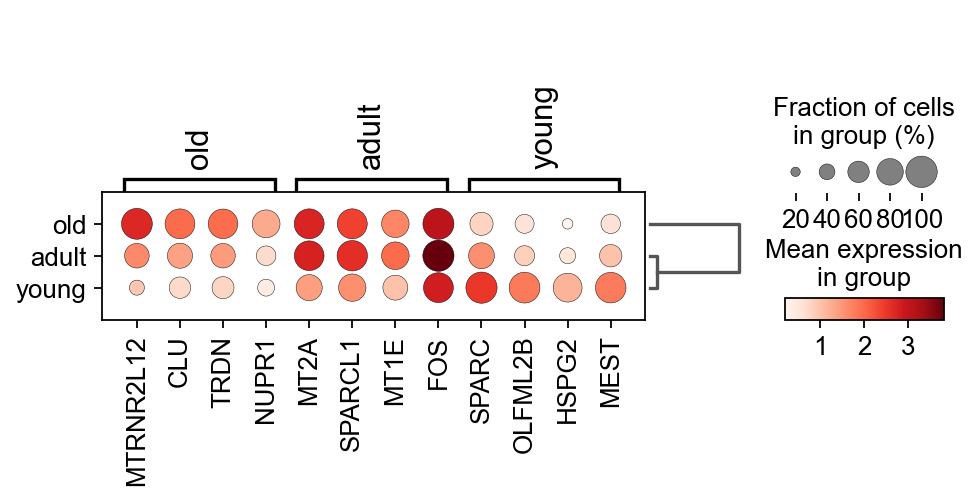

In [17]:
sc.pl.rank_genes_groups_dotplot(adata_prog, n_genes=4)

In [19]:
sc.get.rank_genes_groups_df(adata_prog, group='young')

,names,scores,logfoldchanges,pvals,pvals_adj
0,SPARC,25.197063,2.121926,4.313831e-140,5.253384e-136
1,OLFML2B,24.547792,2.264498,4.566312e-133,2.780427e-129
2,HSPG2,22.170586,2.261835,6.604596e-109,2.681026e-105
3,MEST,21.826576,1.905544,1.297828e-105,3.951237e-102
4,PFN1,21.398540,1.664824,1.378562e-101,3.357626e-98
...,...,...,...,...,...
12173,CLU,-18.531450,-1.926940,1.151414e-76,8.248189e-74
12174,ADIRF,-18.595768,-1.786041,3.477026e-77,2.646452e-74
12175,MT1X,-19.855709,-1.308136,9.836267e-88,9.982172e-85
12176,CXCL14,-19.883945,-1.663038,5.604825e-88,6.205051e-85


In [ ]:
#export your DE file
dedf = sc.get.rank_genes_groups_df(adata_subset, group='young', key='wilcoxon')

In [ ]:
dedf.to_csv('young_cluster4.csv')